# Implementation linear regression using ordinary least square approch from scratch

Slope: 0.5810, Intercept: -1.0789
Mean Squared Error on Training Data: 0.1074
R² Score on Training Data: 0.7802
Mean Squared Error on Test Data: 0.1061
R² Score on Test Data: 0.7089


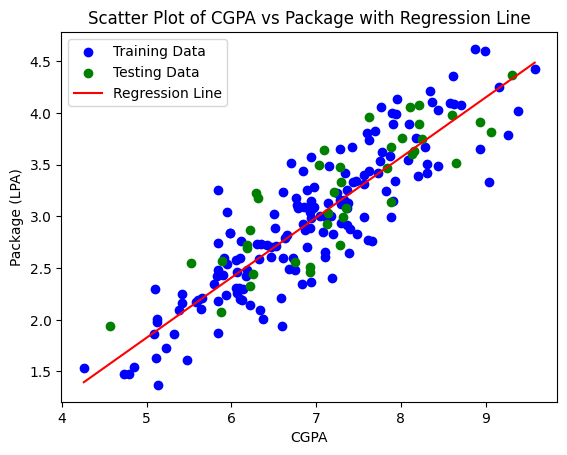

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = "placement.csv"
df = pd.read_csv(file_path)

# Extract features (CGPA) and target variable (Package)
X = df[['cgpa']].values  # Feature (CGPA)
y = df['package'].values.reshape(-1, 1)  # Target (Package)

# Manually split data into training (80%) and testing (20%)
train_size = int(0.8 * X.shape[0])
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

def find_m_b_r2(x, y):
    mean_x = x.mean()
    mean_y = y.mean()
    
    numerat = np.sum((x - mean_x) * (y - mean_y))
    denominat = np.sum((x - mean_x) ** 2)
    
    slope_m = numerat / denominat  # calculating slope
    intercept_b = mean_y - slope_m * mean_x  # calculating intercept

    # Calculate residuals and total sum of squares
    y_pred = slope_m * x + intercept_b
    ss_residual = np.sum((y - y_pred) ** 2)
    ss_total = np.sum((y - mean_y) ** 2)
    
    mse = ss_residual / x.shape[0]  # Mean Squared Error
    r2_score = 1 - (ss_residual / ss_total)  # R² Score
    
    return slope_m, intercept_b, mse, r2_score

# Compute slope, intercept, MSE, and R² score on training data
m, b, error, r2 = find_m_b_r2(X_train.flatten(), y_train.flatten())
print(f"Slope: {m:.4f}, Intercept: {b:.4f}")
print(f"Mean Squared Error on Training Data: {error:.4f}")
print(f"R² Score on Training Data: {r2:.4f}")

# Evaluate on test data
y_test_pred = m * X_test + b
test_mse = np.mean((y_test - y_test_pred) ** 2)
test_r2 = 1 - (np.sum((y_test - y_test_pred) ** 2) / np.sum((y_test - y_test.mean()) ** 2))
print(f"Mean Squared Error on Test Data: {test_mse:.4f}")
print(f"R² Score on Test Data: {test_r2:.4f}")

# Generate regression line
X_line = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_line = m * X_line + b

# Plot results
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.scatter(X_test, y_test, color='green', label='Testing Data')
plt.plot(X_line, y_line, color='red', label='Regression Line')
plt.legend()
plt.xlabel('CGPA')
plt.ylabel('Package (LPA)')
plt.title('Scatter Plot of CGPA vs Package with Regression Line')
plt.show()


# Using sklearn model

Equation of Regression Line: package = 0.5743 * cgpa + -1.0270
Training MSE: 0.1126, Testing MSE: 0.0842
Training R²: 0.7758, Testing R²: 0.7731


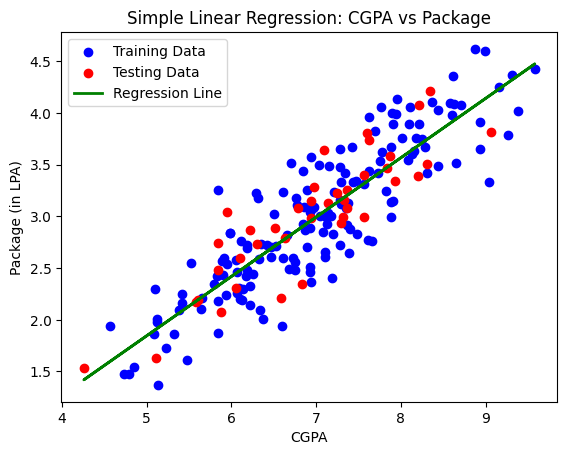

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
file_path = "placement.csv"
df = pd.read_csv(file_path)

# Extract features and target variable
X = df[['cgpa']].values  # Feature (CGPA)
y = df['package'].values  # Target (Package)

# Split the data into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Get model parameters
m = model.coef_[0]  # Slope
b = model.intercept_  # Intercept

# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Compute Mean Squared Error (MSE)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

# Compute R² Score
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Print results
print(f"Equation of Regression Line: package = {m:.4f} * cgpa + {b:.4f}")
print(f"Training MSE: {mse_train:.4f}, Testing MSE: {mse_test:.4f}")
print(f"Training R²: {r2_train:.4f}, Testing R²: {r2_test:.4f}")

# Plot the regression line
plt.scatter(X_train, y_train, color="blue", label="Training Data")
plt.scatter(X_test, y_test, color="red", label="Testing Data")
plt.plot(X, model.predict(X), color="green", linewidth=2, label="Regression Line")
plt.xlabel("CGPA")
plt.ylabel("Package (in LPA)")
plt.title("Simple Linear Regression: CGPA vs Package")
plt.legend()
plt.show()


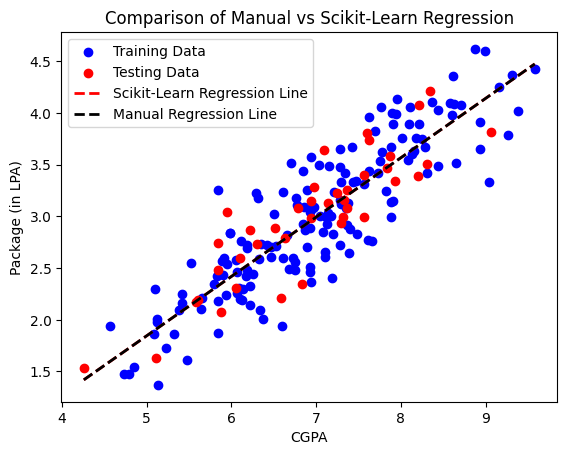

In [ ]:
# Generate regression line points
X_line = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_manual = m * X_line + b  # Regression line from manual approach
y_sklearn = model.predict(X_line)  # Regression line from Scikit-Learn

# Plot the data points
plt.scatter(X_train, y_train, color="blue", label="Training Data")
plt.scatter(X_test, y_test, color="red", label="Testing Data")

# Plot both regression lines
plt.plot(X_line, y_sklearn, color="red", linestyle="dashed", linewidth=2, label="Scikit-Learn Regression Line")
plt.plot(X_line, y_manual, color="black", linestyle="dashed", linewidth=2, label="Manual Regression Line")

# Labels and legend
plt.xlabel("CGPA")
plt.ylabel("Package (in LPA)")
plt.title("Comparison of Manual vs Scikit-Learn Regression")
plt.legend()
plt.show()

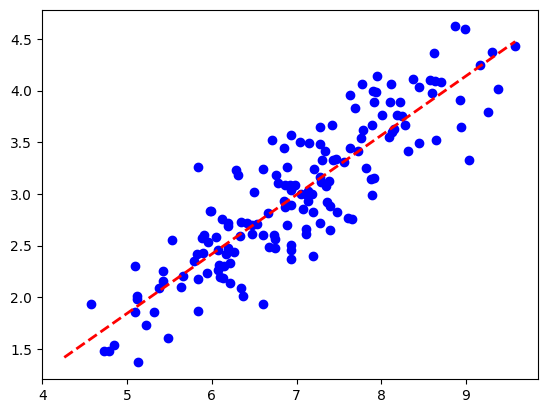

In [21]:
plt.scatter(X_train, y_train, color="blue", label="Training Data")
plt.plot(X_line, y_sklearn, color="red", linestyle="dashed", linewidth=2, label="Scikit-Learn Regression Line")